In [1]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Lendo banco de dados do ENEM 2019 (Amostra)
dados = pd.read_csv(fonte)
dados.shape

(127380, 136)

In [2]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [4]:
# Mostrando a 10 primeiras idades e seus totais de participantes em ordem crescente
dados[ "NU_IDADE"].value_counts().sort_index().head(10)

13        4
14      141
15     2009
16     7830
17    21256
18    21452
19    14418
20    10413
21     7267
22     5924
Name: NU_IDADE, dtype: int64

Desafio01: Encontrar os valores relativos para as idades dos incritos

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Colocar título no gráfico

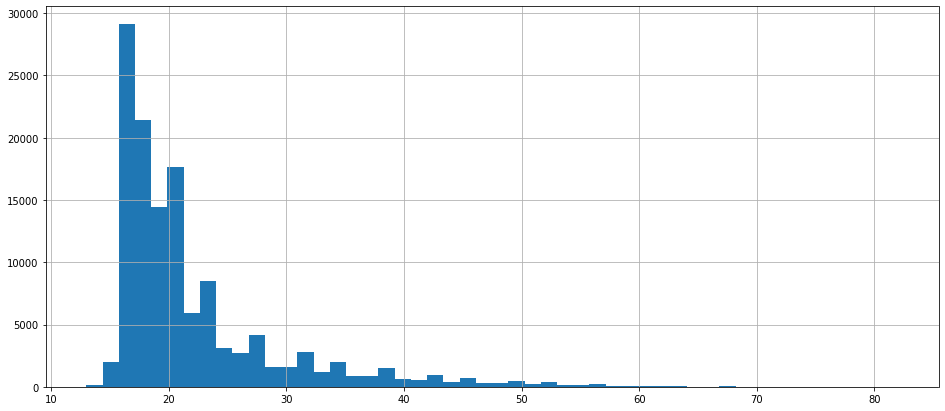

In [5]:
# Mostrando histograma das idades dos participantes
dados[ "NU_IDADE"].hist(bins = 50, figsize = (16, 7))

In [6]:
# Fazendo query no bando de dados para pegar somente observacoes de treineiros, depois mostrando o total das idades em ordem crescente
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index().head(5)

14      64
15    1927
16    7142
17    4901
18     858
Name: NU_IDADE, dtype: int64

Desafio04: Plotar os histogramas das idades dos treineiros e não treineiros

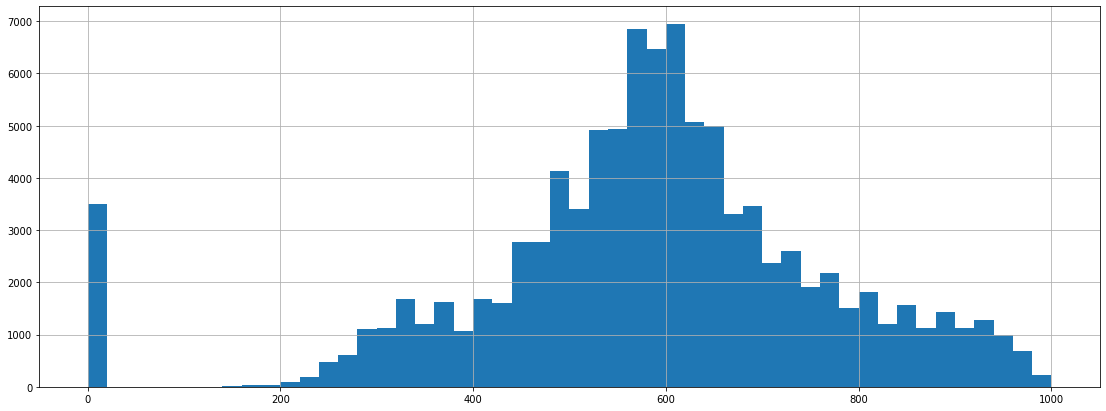

In [7]:
# Plotando histograma das notas da redacao
dados["NU_NOTA_REDACAO"].hist(bins = 50, figsize=(19, 7))

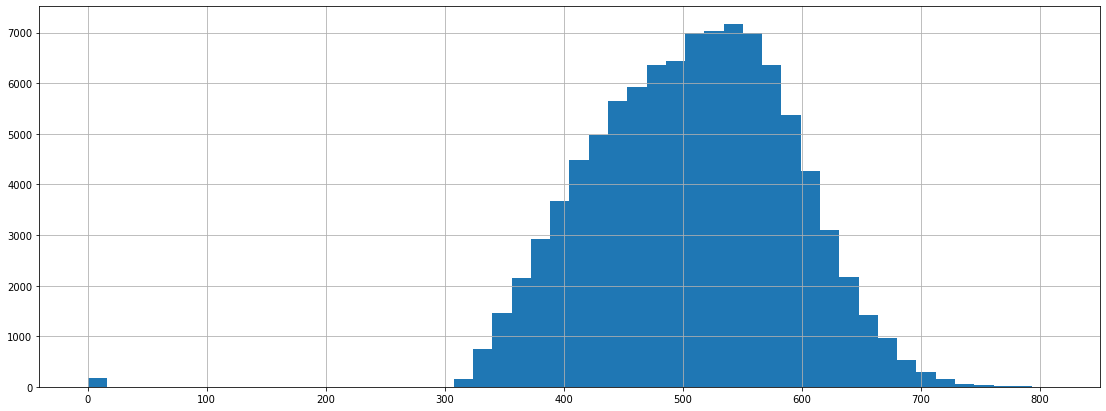

In [8]:
# Plotando histograma das notas da prova de Ciências Humanas
dados["NU_NOTA_CH"].hist(bins = 50, figsize=(19, 7))

In [9]:
# Fazendo query no bando de dados para pegar somente observacoes do Estado de Minas
# Depois separando somente as notas das provas 
# Por fim mostrando dados estatísticos

provas = ["NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
dados.query("SG_UF_RESIDENCIA == 'MG'")[provas].describe()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO
count,10449.000000,10449.000000,9928.000000,9928.000000,10449.000000
mean,530.475223,520.568504,546.324658,492.778556,595.752704
std,62.763267,84.216336,116.783403,79.518002,194.142967
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,497.400000,460.800000,451.200000,430.475000,500.000000
50%,535.500000,527.000000,530.600000,489.650000,600.000000
75%,572.300000,580.400000,631.225000,552.300000,720.000000
max,737.900000,790.000000,971.300000,792.000000,980.000000


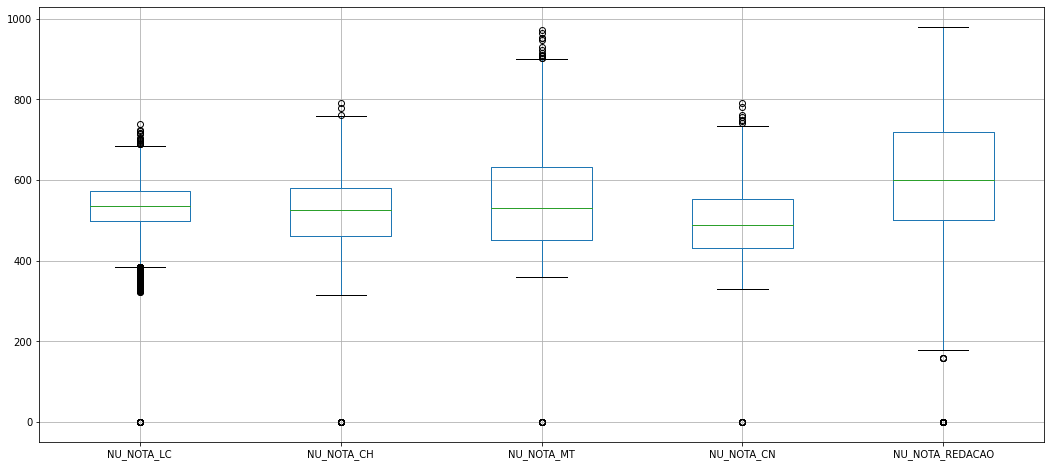

In [10]:
# Fazendo query no bando de dados para pegar somente observacoes do Estado de Minas
# Depois separando somente as notas das provas 
# Por fim plotando grafico boxplot contendo as notas das provas

provas = ["NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
dados.query("SG_UF_RESIDENCIA == 'MG'")[provas].boxplot(grid = 1, figsize=(18,8))

Desafio05: Comparar as distribuições das provas em inglês e espanhol nas provas de LC

In [11]:

#Resolvendo desafio 01

dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PB    0.048276
GO    0.048276
PI    0.048276
AM    0.027586
MT    0.027586
DF    0.027586
TO    0.020690
PR    0.020690
SE    0.020690
SC    0.013793
AL    0.013793
RO    0.013793
RJ    0.006897
AP    0.006897
ES    0.006897
RS    0.006897
AC    0.006897
RN    0.006897
MS    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

In [12]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
print(renda_ordenada)


['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

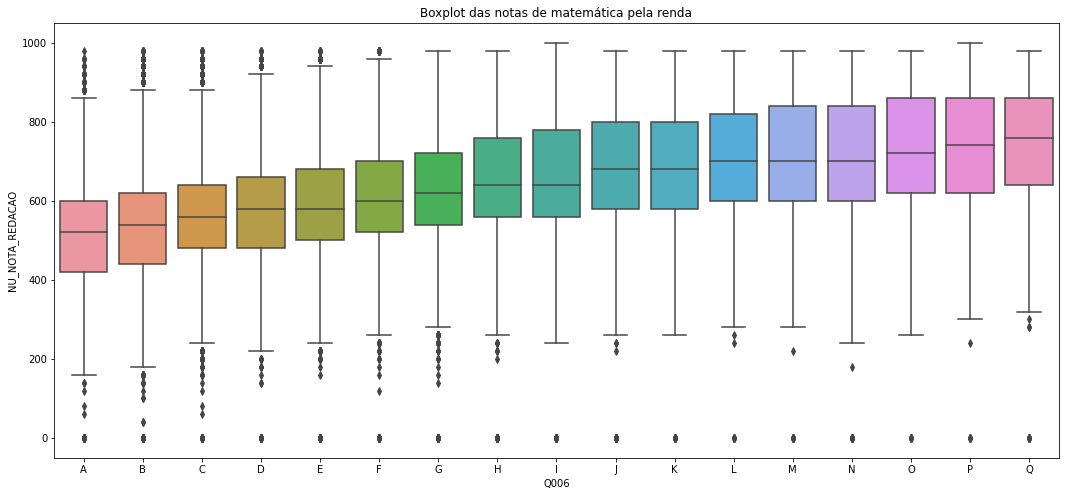

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_REDACAO", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

In [14]:
total_notas_por_aluno = dados[provas].sum(axis=1)
dados["NU_NOTA_TOTAL"] = total_notas_por_aluno
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas todais pela renda')

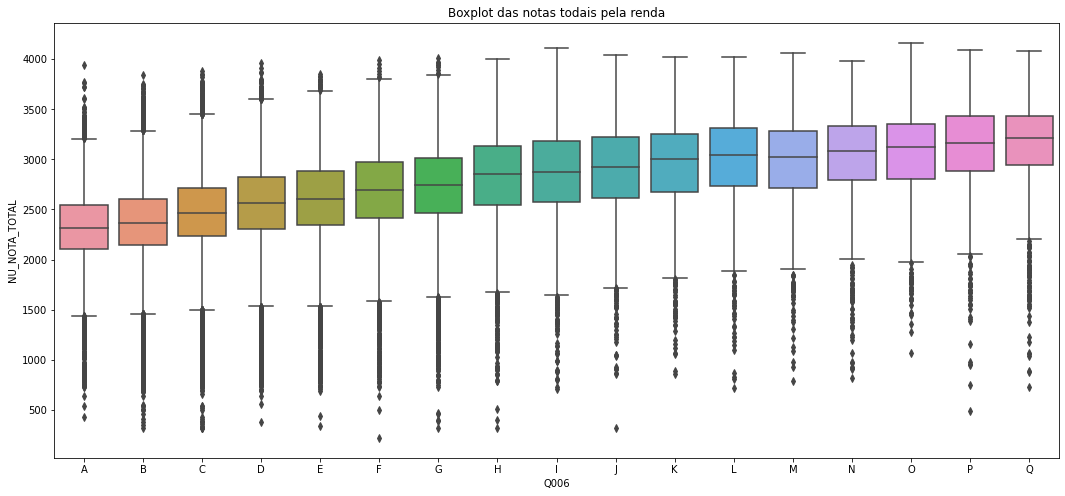

In [15]:
plt.figure(figsize=(18, 8))
dados_sem_zeros = dados.query("NU_NOTA_TOTAL != 0")
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zeros, order = renda_ordenada)
plt.title("Boxplot das notas todais pela renda")

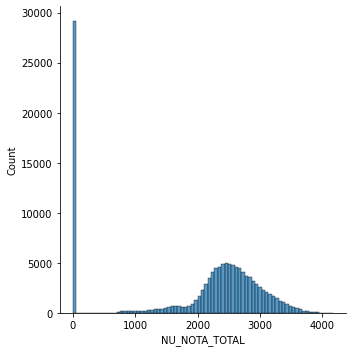

In [16]:
sns.displot(dados, x = "NU_NOTA_TOTAL")

Text(0.5, 1.0, 'Boxplot das notas todais pela renda')

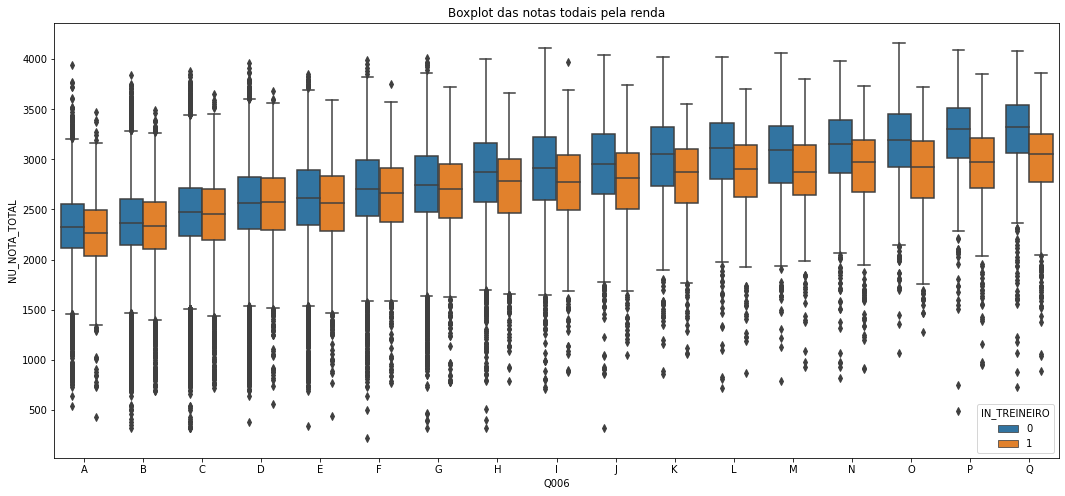

In [17]:
plt.figure(figsize=(18, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zeros, order = renda_ordenada, hue= "IN_TREINEIRO")
plt.title("Boxplot das notas todais pela renda")

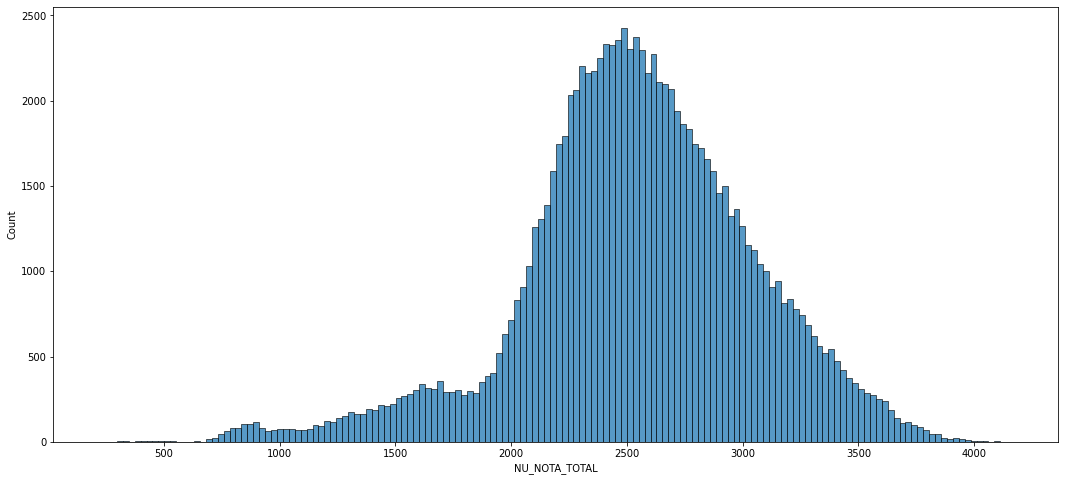

In [18]:
plt.figure(figsize=(18, 8))
sns.histplot(dados_sem_zeros, x = "NU_NOTA_TOTAL")

(-50.0, 1050.0)

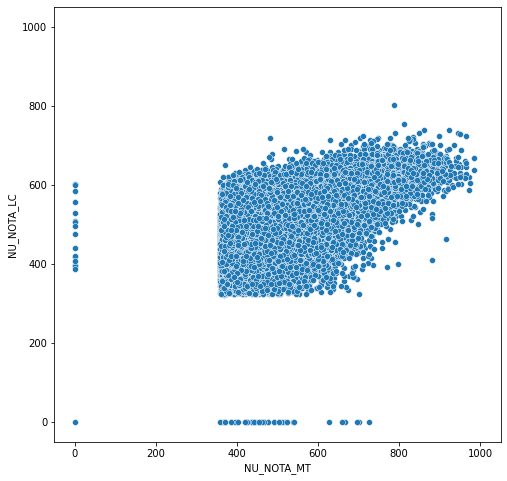

In [19]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = dados_sem_zeros, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [20]:
correlacao = dados_sem_zeros[provas].corr()
correlacao

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO
NU_NOTA_LC,1.000000,0.744170,0.587710,0.641624,0.535797
NU_NOTA_CH,0.744170,1.000000,0.610332,0.668979,0.528338
NU_NOTA_MT,0.587710,0.610332,1.000000,0.649527,0.493046
NU_NOTA_CN,0.641624,0.668979,0.649527,1.000000,0.504740
NU_NOTA_REDACAO,0.535797,0.528338,0.493046,0.504740,1.000000


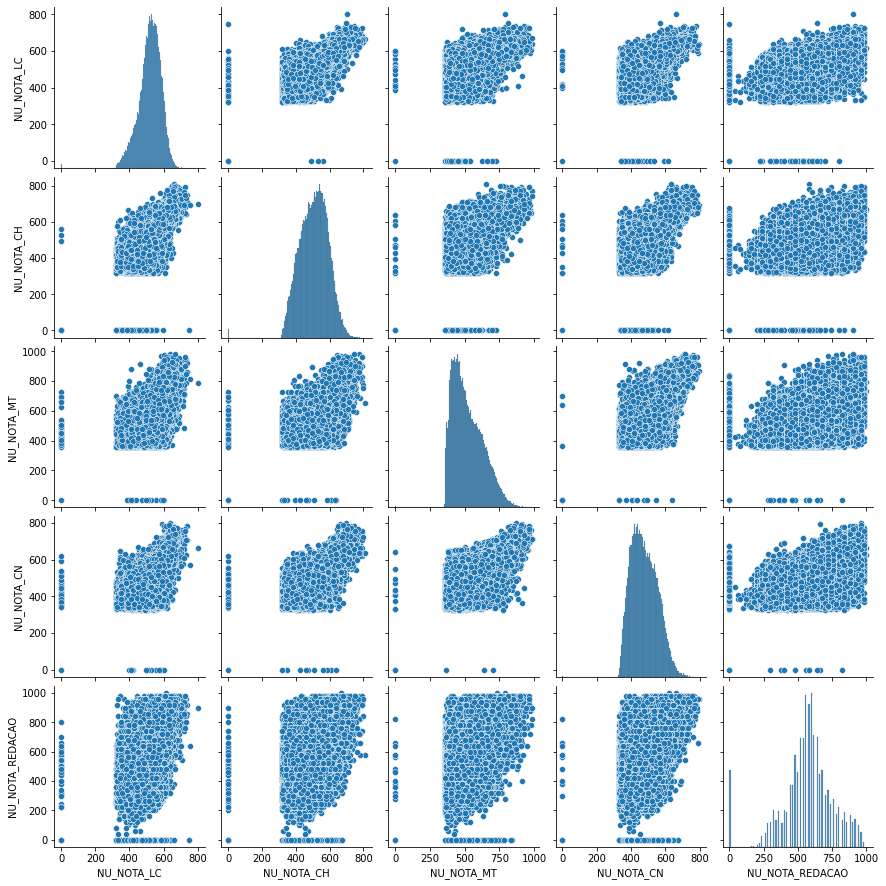

In [21]:
sns.pairplot(dados_sem_zeros[provas])

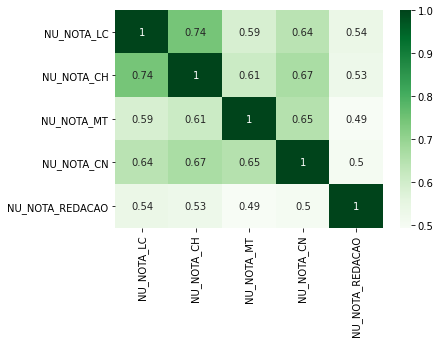

In [22]:
sns.heatmap(correlacao, cmap="Greens", annot=True)

In [23]:
provas_entra = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

dados_sem_nan = dados_sem_zeros[provas].dropna()

notas_entra = dados_sem_nan[provas_entra]
notas_saida = dados_sem_nan[prova_saida]


In [24]:
notas_entra

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [25]:
x = notas_entra
y = notas_saida

In [26]:
from sklearn.model_selection import train_test_split
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [27]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [28]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)

modelo.fit(x_treino, y_treino)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [29]:
predicoes_nota_mt = modelo.predict(x_teste)
predicoes_nota_mt[:5]

array([564.48610537, 628.305027  , 509.98098555, 593.68114412,
       579.78458758])

In [30]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

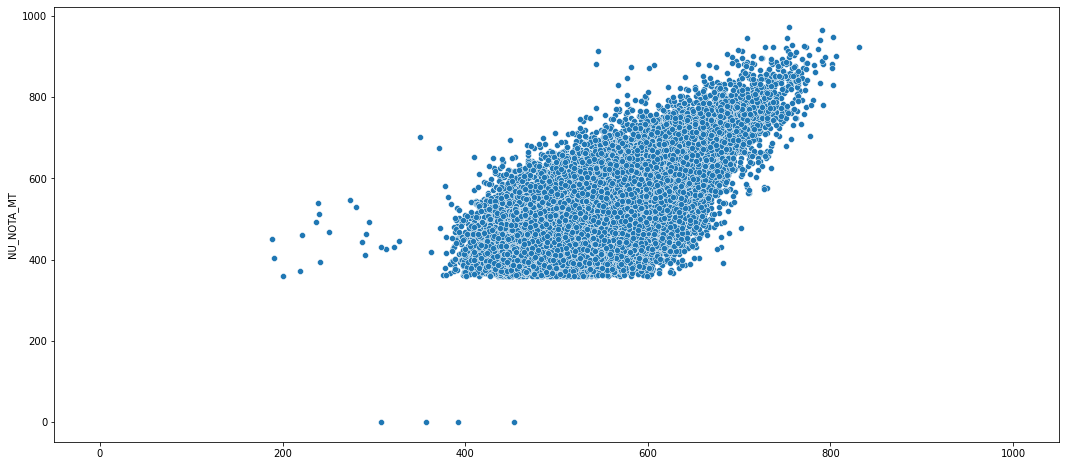

In [31]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x=predicoes_nota_mt, y=y_teste)
plt.xlim((-50, 1050))
plt.xlim((-50, 1050))

(1.0, 1050.0)

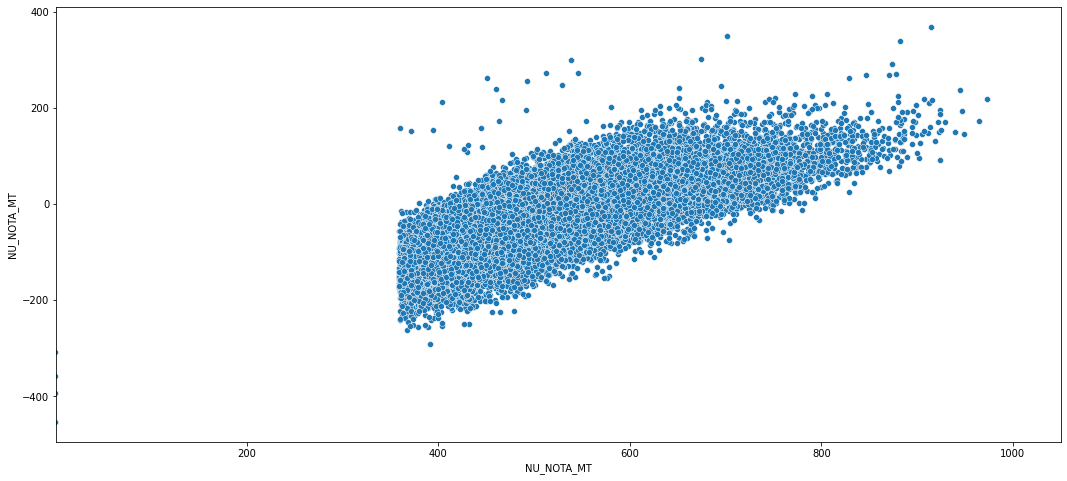

In [32]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_nota_mt)
plt.xlim((1, 1050))
plt.xlim((1, 1050))

In [33]:
resultados = pd.DataFrame()

resultados["real"] = y_teste
resultados["previsao"] = predicoes_nota_mt
resultados["diferenca"] = resultados["real"] - resultados["previsao"]
resultados["diferenca quad"] = (resultados["real"] - resultados["previsao"])**2
resultados["diferenca abs"] = abs(resultados["real"] - resultados["previsao"])

resultados

,real,previsao,diferenca,diferenca quad,diferenca abs
114991,459.7,564.486105,-104.786105,10980.127878,104.786105
104685,617.2,628.305027,-11.105027,123.321625,11.105027
91028,520.0,509.980986,10.019014,100.380650,10.019014
115802,703.8,593.681144,110.118856,12126.162420,110.118856
93303,627.1,579.784588,47.315412,2238.748252,47.315412
...,...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380,62.308149
40159,479.1,652.313922,-173.213922,30003.062777,173.213922
64083,501.4,607.787172,-106.387172,11318.230438,106.387172
84661,772.5,734.227663,38.272337,1464.771772,38.272337


In [34]:
resultados["diferenca quad"].mean()**(1/2)

81.26755383435341

In [35]:
resultados["diferenca abs"].mean()

66.04555425503273

In [36]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)

dummy_predicoes = modelo_dummy.predict(y_teste)


In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)**(1/2)

109.83462836696586

In [38]:
mean_squared_error(y_teste, predicoes_nota_mt)**(1/2)

81.26755383435366

Desafio: Procurar outros modelos de ML para treinar e compara com os modelos criados em aula.

Desafio 02: Ler a documentação do Dymmt e alterar o método de regressão.

Desafio 03: Buscar outras métricas para avaliar modelos de regressão.

# Aula 5


In [42]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)
predicoes_mat = modelo.predict(x_teste)

mean_squared_error(y_teste, predicoes_mat)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6604.41530621957

In [49]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_mat_arvore = modelo.predict(x_teste)

mean_squared_error(y_teste, predicoes_mat_arvore)

6634.386652622332

In [85]:
def calcula_mse(resultados):
  media = (resultados["test_score"]*-1).mean()
  desvio_padrao = (resultados["test_score"]*-1).std()
  lim_inferior = media - 2*desvio_padrao
  lim_superior = media - 2*desvio_padrao
  print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [90]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

def regressor_arvore(profundidade):
  SEED = 1232
  np.random.seed(SEED)
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth= profundidade)
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error', return_train_score=True)
  print(f"Teste = {(resultados['test_score']*-1).mean()} || Treino = {(resultados['train_score']*-1).mean()}")

In [91]:
for i in range(1, 21):
  regressor_arvore(i)


Teste = 7857.871770206351 || Treino = 7844.952652412207
Teste = 6556.886287657656 || Treino = 6527.783475408351
Teste = 6054.767567442072 || Treino = 6021.275229419075
Teste = 5815.707286597402 || Treino = 5760.834451245899
Teste = 5675.196789060744 || Treino = 5598.158955426787
Teste = 5593.304363812442 || Treino = 5469.677369145869
Teste = 5541.646599457925 || Treino = 5369.458309852721
Teste = 5542.053091078966 || Treino = 5276.16965707928
Teste = 5608.390265709719 || Treino = 5166.713159932668
Teste = 5761.4934268457555 || Treino = 5022.598049115693
Teste = 5955.331403579403 || Treino = 4833.560706021637
Teste = 6217.553668629227 || Treino = 4598.125022484774
Teste = 6521.403312280134 || Treino = 4316.3791662866815
Teste = 6853.984106997142 || Treino = 4000.6209880837496
Teste = 7224.863053512405 || Treino = 3655.8197526274853
Teste = 7636.168819779455 || Treino = 3295.832684540846
Teste = 8071.851486256819 || Treino = 2931.7212612043877
Teste = 8452.126711298857 || Treino = 2575.5